# Week 1 - Function 1 ((11DP, 2D))

# Setup
Let's load all the imports in the top to avoid repeating and simplify the readability of each solution.

In [39]:
import numpy as np

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, ConstantKernel
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import norm

from utils.plotting_utils import (
    plot_2D_initial_data,
    plot_output_outliers,
    plot_2D_mean_uncertainty
)

# Plan
We now have ((11, 2)) - 10DP & 2D that can be found `./data/week_1/function_2/`.

0. Setup:
    1. Load Load new and previous week data
    2. Compare weekly change
    3. Results interpretation
1. Build probabilistic Model
2. Acquisition Function


# 0.1. Setup > Load new and previous week data

In [40]:
X_train_old_raw = np.load(r"./data/initial_data/function_1/initial_inputs.npy")
y_train_old_raw = np.load(r"./data/initial_data/function_1/initial_outputs.npy")

scaler_old_X = MinMaxScaler()
scaler_old_y = StandardScaler()

X_old_train = scaler_old_X.fit_transform(X_train_old_raw)
y_old_train = scaler_old_y.fit_transform(y_train_old_raw.reshape(-1, 1)).ravel()


X_train_raw = np.load(r"./data/week_1/function_1/inputs.npy")
y_train_raw = np.load(r"./data/week_1/function_1/outputs.npy")


scaler_X = MinMaxScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(X_train_raw)
y_train = scaler_y.fit_transform(y_train_raw.reshape(-1, 1)).ravel()

# 0.2. Setup > Compare weekly change

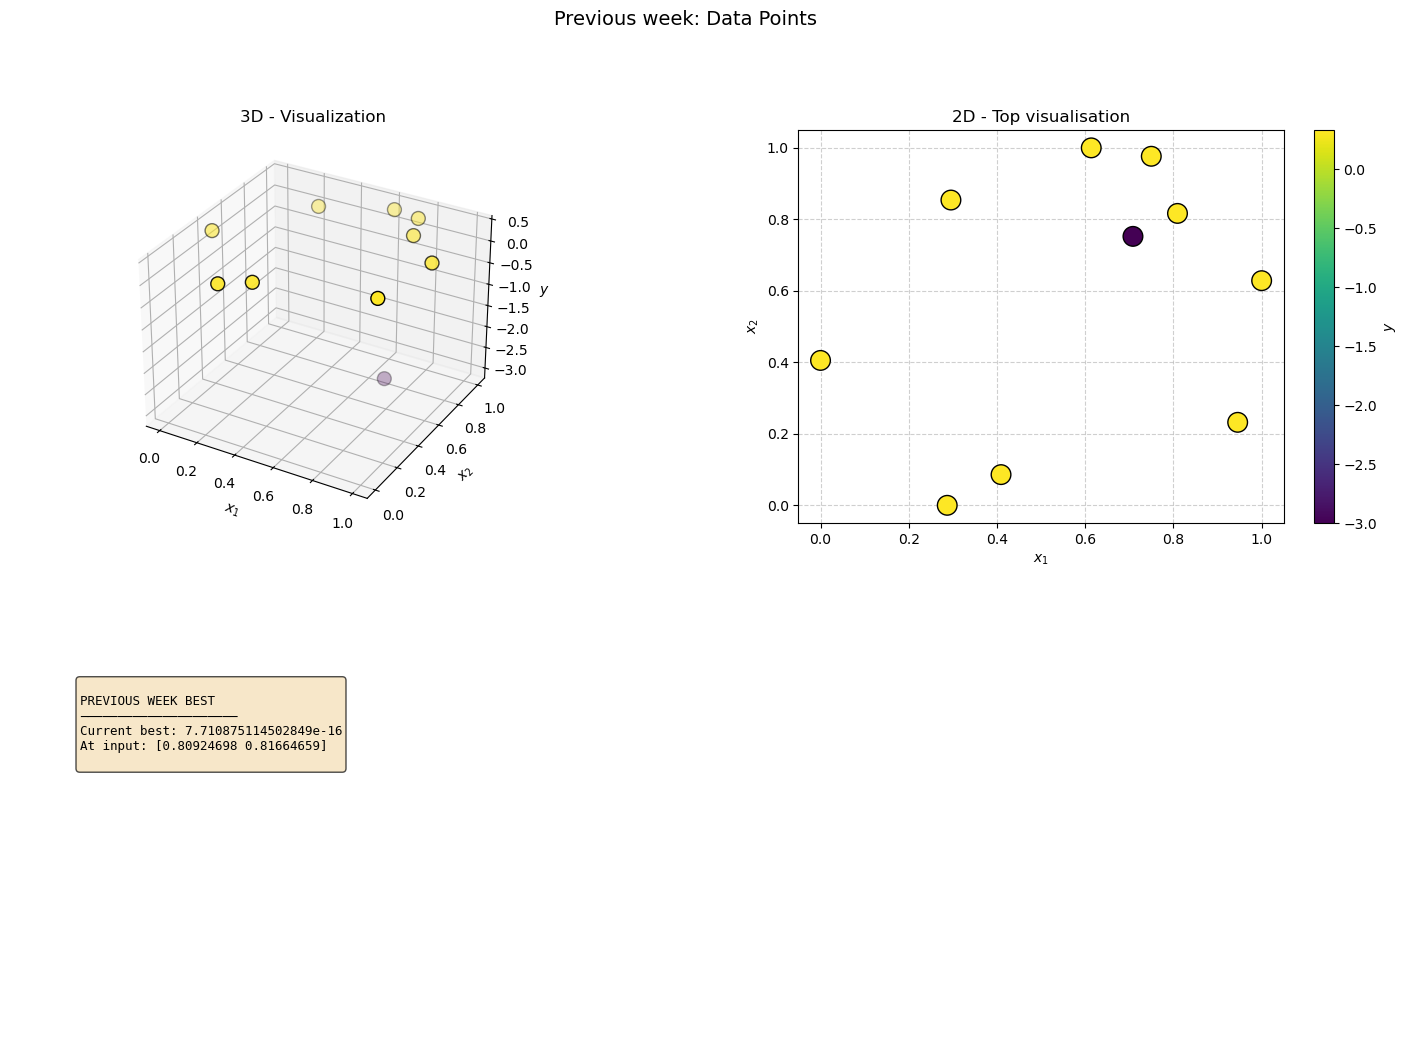

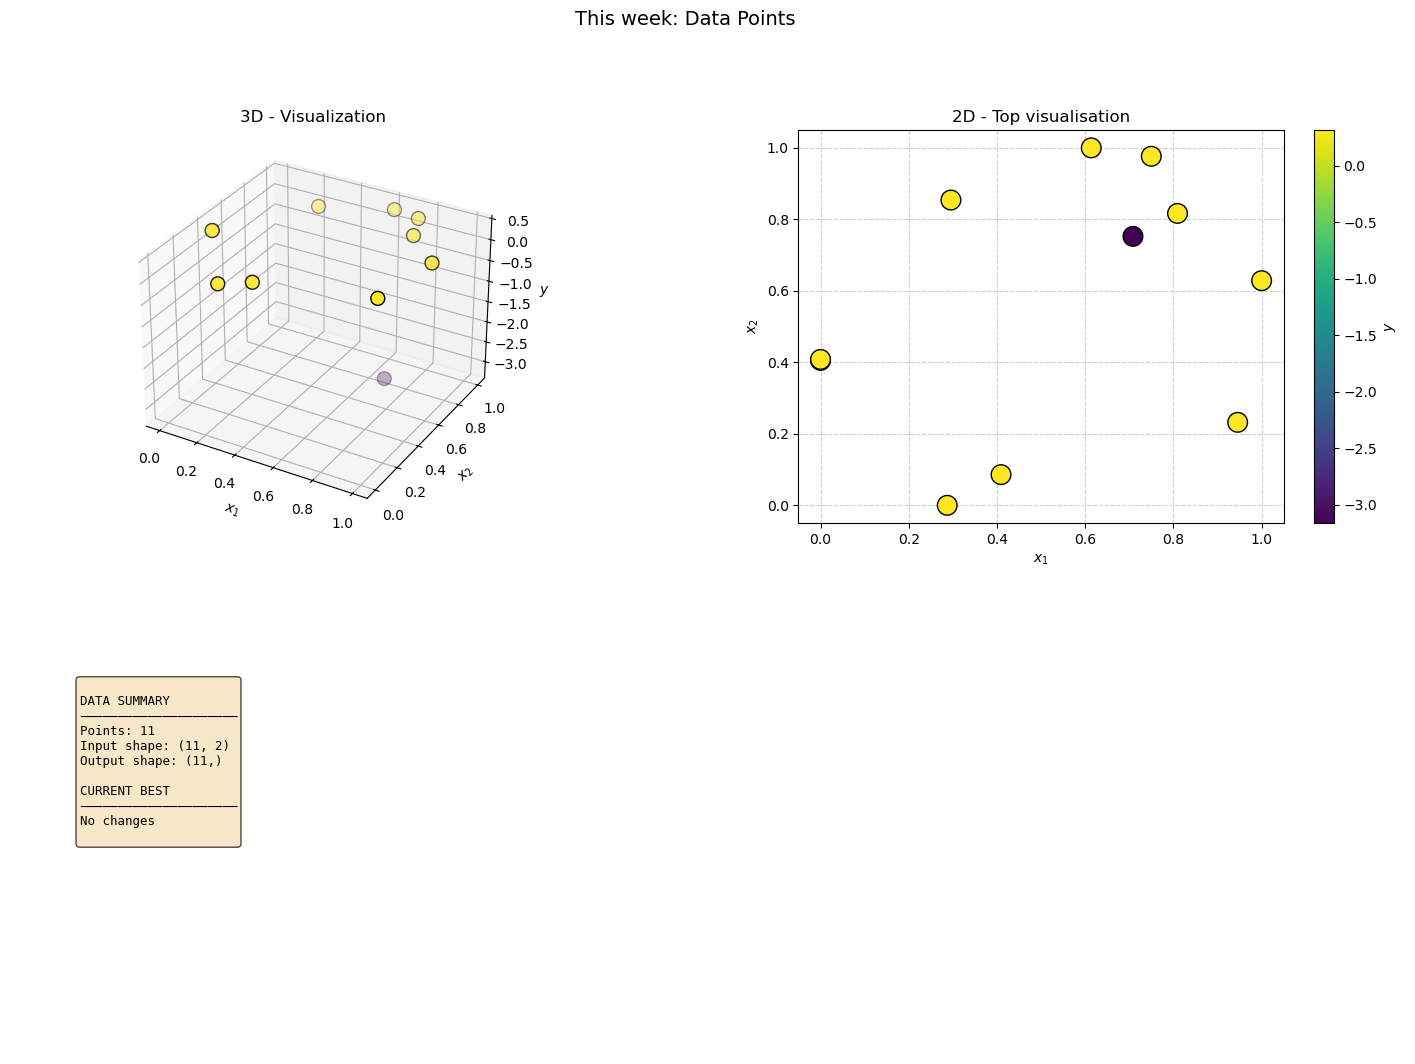

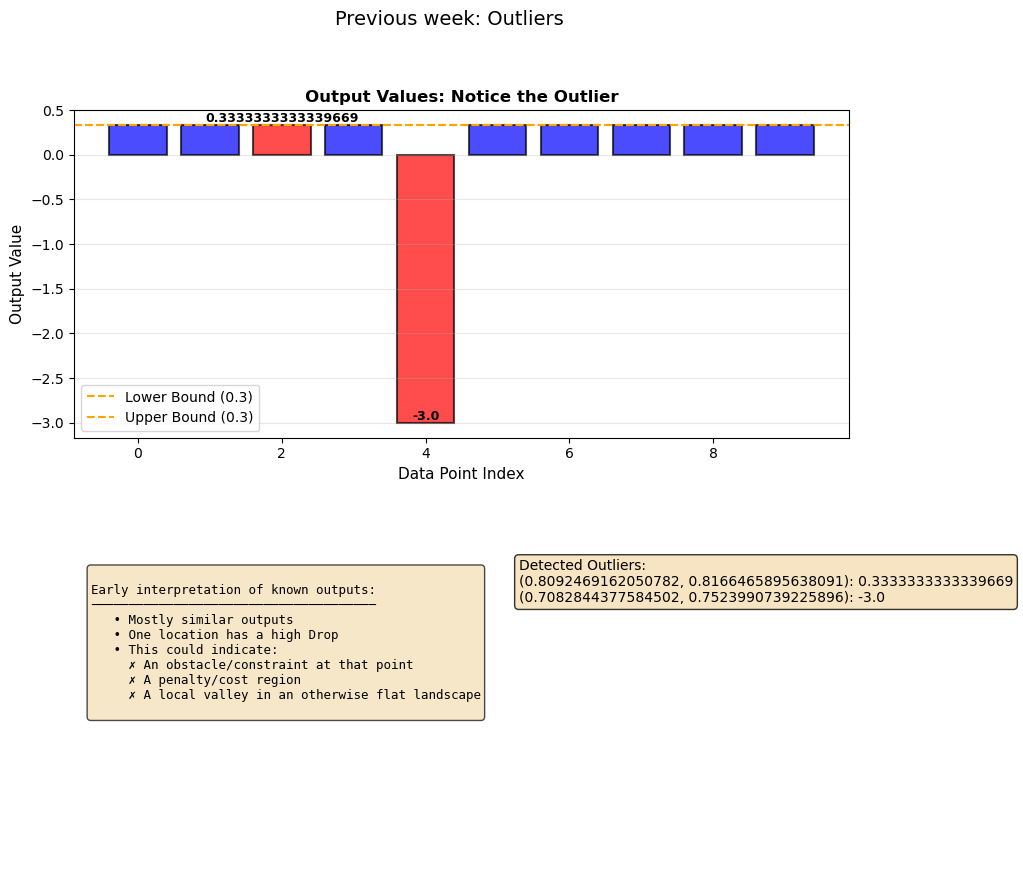

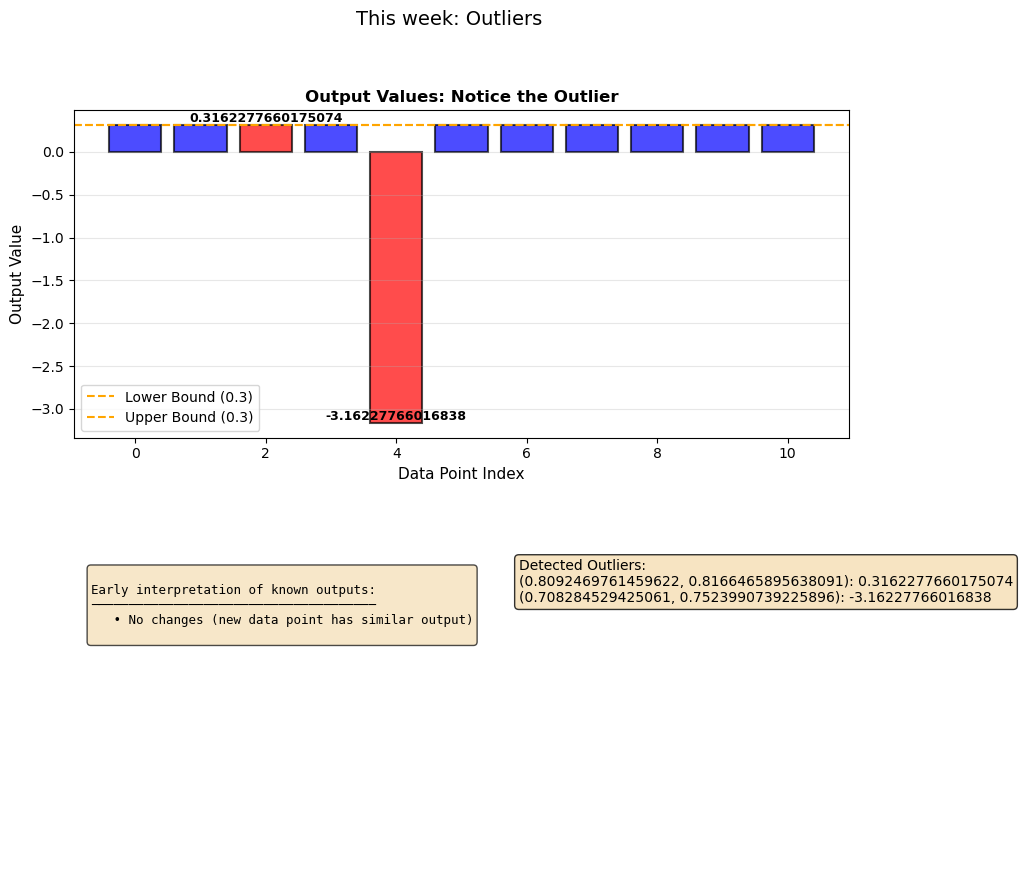

In [41]:
plot_2D_initial_data(X_old_train, y_old_train, "Previous week: Data Points", f"""
PREVIOUS WEEK BEST
─────────────────────
Current best: {np.max(y_train_old_raw)}
At input: {X_train[np.argmax(y_old_train)]}
""")

plot_2D_initial_data(X_train, y_train, "This week: Data Points", f"""
DATA SUMMARY
─────────────────────
Points: {len(X_train)}
Input shape: {X_train.shape}
Output shape: {y_train.shape}

CURRENT BEST
─────────────────────
No changes
""")

plot_output_outliers(X_old_train, y_old_train, "Previous week: Outliers", f"""
Early interpretation of known outputs:
──────────────────────────────────────
   • Mostly similar outputs
   • One location has a high Drop
   • This could indicate:
     ✗ An obstacle/constraint at that point
     ✗ A penalty/cost region
     ✗ A local valley in an otherwise flat landscape
""")

plot_output_outliers(X_train, y_train, "This week: Outliers", f"""
Early interpretation of known outputs:
──────────────────────────────────────
   • No changes (new data point has similar output)
""")

# 0.5. Setup > Results interpretation

In [42]:
print(f"""
No learning that we can get from this images.
Next week I should add correlation heatmap since it is working well with higher dimension functions.
""")


No learning that we can get from this images.
Next week I should add correlation heatmap since it is working well with higher dimension functions.



# 1. Build probabilistic Model

We will continue with the same Kernel but we will do some tweaks in the kernel sensitivity since GP Uncertainty Surface was mostly flat in last week plot.

last week


/opt/anaconda3/lib/python3.13/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-07. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


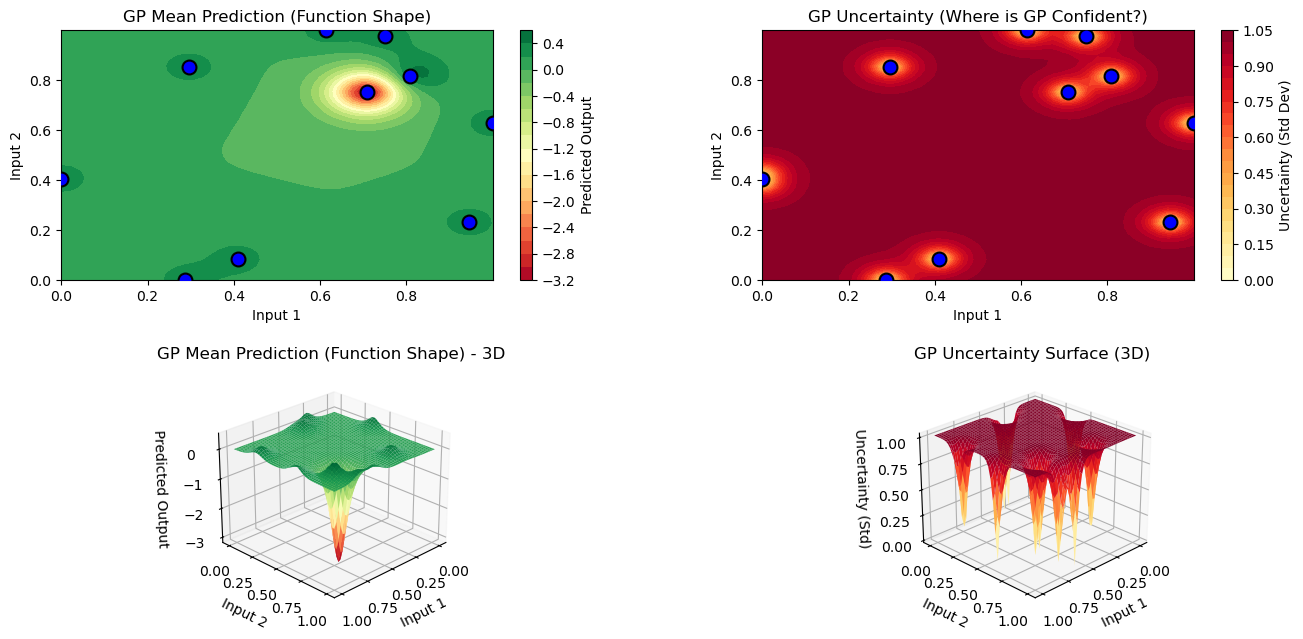

this week no changes


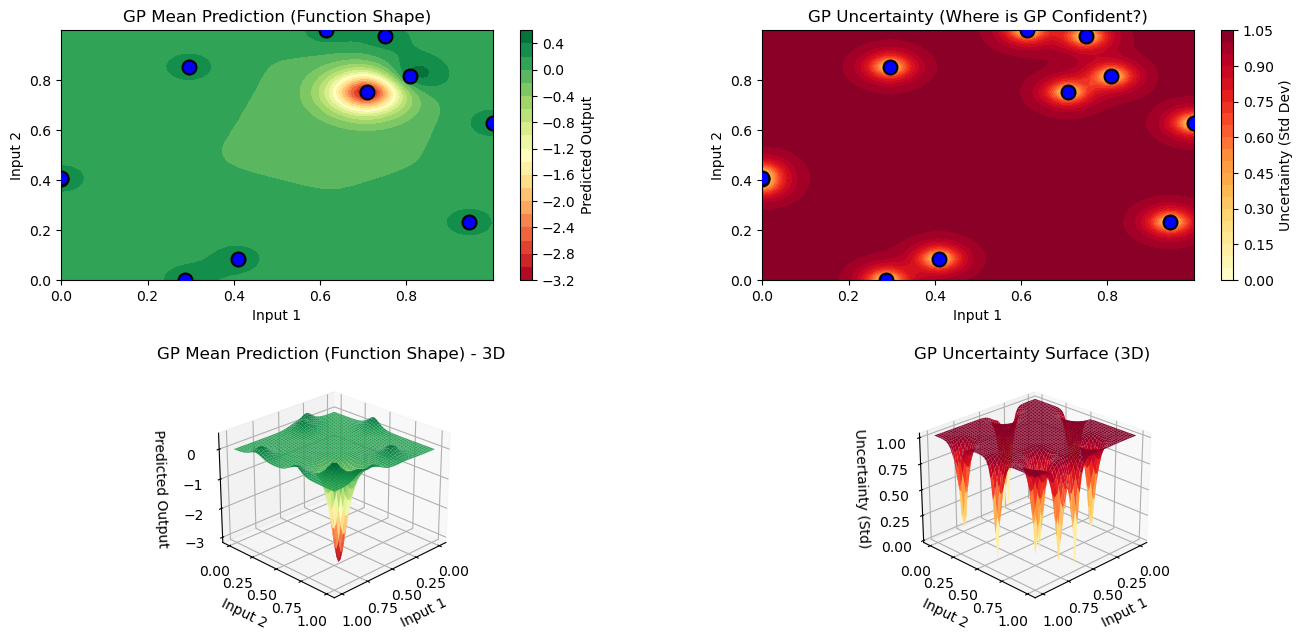

this week changes


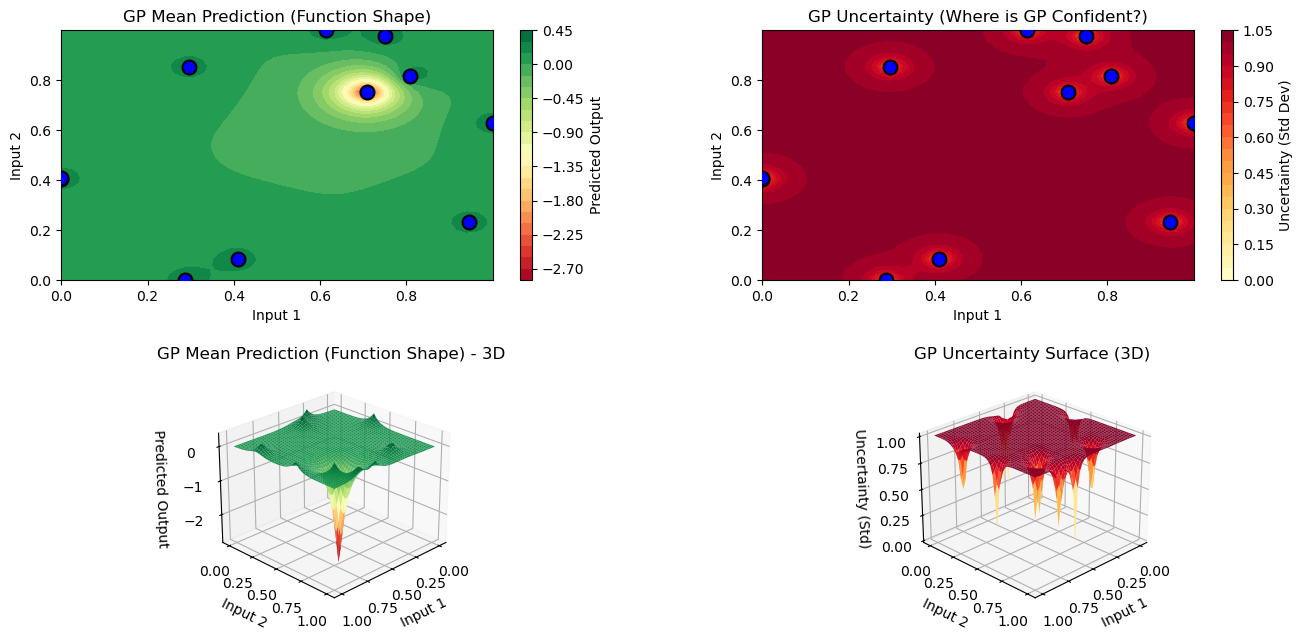

In [43]:
# Last week kernel
kernel_old = ConstantKernel(1.0, (1e-3, 1e3)) * Matern(
    length_scale=1.0,
    nu=2.5,
    length_scale_bounds=(1e-7, 1e2)
)

model_old = GaussianProcessRegressor(
    kernel=kernel_old,
    alpha=1e-6,
    normalize_y=False,
    n_restarts_optimizer=10
)

model_old.fit(X_old_train, y_old_train)

# This week kernel with no changes
kernel_no_changes = ConstantKernel(1.0, (1e-3, 1e3)) * Matern(
    length_scale=1.0,
    nu=2.5,
    length_scale_bounds=(1e-7, 1e2)
)

model_no_changes = GaussianProcessRegressor(
    kernel=kernel_no_changes,
    alpha=1e-6,
    normalize_y=False,
    n_restarts_optimizer=10
)

model_no_changes.fit(X_train, y_train)

# This week kernel after changes
kernel = ConstantKernel(1.0, (1e-3, 1e3)) * Matern(
    length_scale=1.0,
    nu=0.5,
    length_scale_bounds=(1e-7, 1e2)
)

model = GaussianProcessRegressor(
    kernel=kernel,
    alpha=1e-6,
    normalize_y=True,
    n_restarts_optimizer=10
)

model.fit(X_train, y_train)


#  Create prediction grid
n_grid = 50
x1_old_range = np.linspace(max(0, X_train[:, 0].min() - 0.5), min(0.999999, X_train[:, 0].max() + 0.5), n_grid)
x2_old_range = np.linspace(max(0, X_train[:, 1].min() - 0.5), min(0.999999, X_train[:, 1].max() + 0.5), n_grid)

X1_old_test, X2_old_test = np.meshgrid(x1_old_range, x2_old_range)
X_old_grid = np.c_[X1_old_test.ravel(), X2_old_test.ravel()]

n_grid = 50
x1_range = np.linspace(max(0, X_train[:, 0].min() - 0.5), min(0.999999, X_train[:, 0].max() + 0.5), n_grid)
x2_range = np.linspace(max(0, X_train[:, 1].min() - 0.5), min(0.999999, X_train[:, 1].max() + 0.5), n_grid)

X1_test, X2_test = np.meshgrid(x1_range, x2_range)
X_grid = np.c_[X1_test.ravel(), X2_test.ravel()]

# Make predictions
mu_old, sigma_old = model_old.predict(X_old_grid, return_std=True)
mu_no_changes, sigma_no_changes = model_no_changes.predict(X_grid, return_std=True)
mu, sigma = model.predict(X_grid, return_std=True)

print('last week')
plot_2D_mean_uncertainty(
   X_old_train,
   model_old,
   X1_old_test,
   X2_old_test,
   mu_no_changes,
   sigma_no_changes,
)

print('this week no changes')
plot_2D_mean_uncertainty(
   X_train,
   model_no_changes,
   X1_test,
   X2_test,
   mu_no_changes,
   sigma_no_changes,
)

print('this week changes')
plot_2D_mean_uncertainty(
   X_train,
   model,
   X1_test,
   X2_test,
   mu,
   sigma,
)


# 2. Acquisition function

From early exploration we know that:
- Mostly flat (smooth region)
- One sharp drop (penalty zone)
- Sparse data
- Low dimension

We want to explore to understand better the shape but we want to avoid exploring the penalty zone.

So I decided to select Expected Improvement (EI), since we can have flexibility for exploration and exploitation, since we don't know much about the function, we will use a bit higher exploration than the balanced one but without being too agressive to avoid the outlier.

In [44]:
def expected_improvement(mu, sigma, y_best, xi=0.1):
    """
    Expected Improvement acquisition function

    EI = E[max(f(x) - f(x_best), 0)]
    
    Parameters:
        mu: Mean predictions from GP
        sigma: Standard deviation from GP
        y_best: Current best observed value (in normalized space)
        xi: Exploration parameter (higher = more exploration)
        
    Returns:
        ei: Expected improvement values
    """
    with np.errstate(divide='warn'):
        improvement = mu - y_best - xi
        Z = improvement / sigma
        ei = improvement * norm.cdf(Z) + sigma * norm.pdf(Z)
        ei[sigma == 0.0] = 0.0
    return ei

y_best_norm = np.max(y_train)

xi = 0.2 # a bit more agressive in this phase to increase exploration

ei_values = expected_improvement(mu, sigma, y_best_norm, xi=xi)

print(f"\nExpected Improvement (EI):")
print(f"  Min: {ei_values.min():.8f}")
print(f"  Max: {ei_values.max():.8f}")
print(f"  Mean: {ei_values.mean():.8f}")

print("\nSTEP 7: Finding best next point to evaluate...")

best_idx = np.argmax(ei_values)
x_next_norm = X_grid[best_idx]
ei_best = ei_values[best_idx]

# Convert to original space
x_next_orig = scaler_X.inverse_transform([x_next_norm])[0]

print(f"\n{'='*80}")
print(f"RECOMMENDED NEXT POINT")
print(f"{'='*80}")
print(f"\nIn original space:")
print(f"  Input 1: {x_next_orig[0]:.6f}")
print(f"  Input 2: {x_next_orig[1]:.6f}")
print(f"\nIn normalized space:")
print(f"  Input 1: {x_next_norm[0]:.6f}")
print(f"  Input 2: {x_next_norm[1]:.6f}")

# Get prediction at this point
y_pred_next, y_std_next = model.predict([x_next_norm], return_std=True)
y_pred_next_orig = scaler_y.inverse_transform([[y_pred_next[0]]])[0, 0]

print(f"\nPredicted output at this point:")
print(f"  Normalized: {y_pred_next[0]:.6f} ± {y_std_next[0]:.6f}")
print(f"  Original: {y_pred_next_orig:.6f}")
print(f"  95% CI: [{y_pred_next_orig - 1.96*y_std_next[0]:.6f}, {y_pred_next_orig + 1.96*y_std_next[0]:.6f}]")

print(f"\nExpected Improvement at this point: {ei_best:.8f}")


Expected Improvement (EI):
  Min: 0.00000000
  Max: 0.22308516
  Mean: 0.19075580

STEP 7: Finding best next point to evaluate...

RECOMMENDED NEXT POINT

In original space:
  Input 1: 0.360537
  Input 2: 0.111424

In normalized space:
  Input 1: 0.346938
  Input 2: 0.040816

Predicted output at this point:
  Normalized: 0.148891 ± 0.949388
  Original: -0.000173
  95% CI: [-1.860975, 1.860628]

Expected Improvement at this point: 0.22308516
